In [82]:
#Importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


In [87]:
# Data loading
seg = pd.read_csv(r"C:\Users\User\Desktop\Ezra - My docs\Analysis\Consumer analytics\Datasets\kcb_seg1.csv", index_col='ID')
seg.head()

,Gender,Age,Income,Setting,Marital
ID,,,,,
147072,2,3,10,2,1
147678,1,3,10,1,1
147708,2,3,10,1,2
147909,2,2,10,1,1
146754,2,2,10,2,2


In [88]:
seg.isnull().sum()

Gender     0
Age        0
Income     0
Setting    0
Marital    0
dtype: int64

In [89]:
seg.describe()

,Gender,Age,Income,Setting,Marital
count,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000
mean,1.559278,1.810567,4.711985,1.474871,1.629510
std,0.496634,0.803083,4.004048,0.499529,0.604074
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,2.000000
75%,2.000000,2.000000,10.000000,2.000000,2.000000
max,2.000000,3.000000,10.000000,2.000000,5.000000


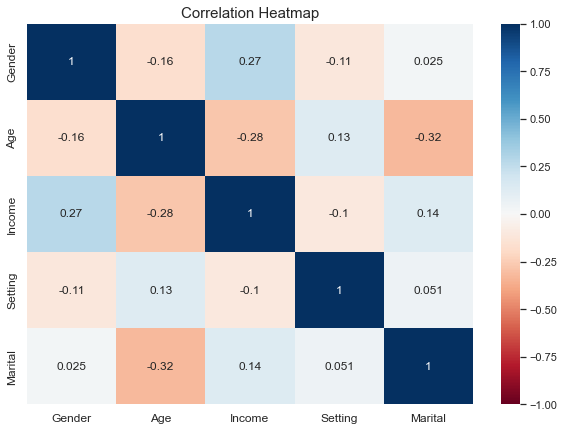

In [90]:
plt.figure(figsize=(10,7))
s= sns.heatmap(seg.corr(),
            annot=True,
            cmap = 'RdBu',
            vmin = -1,
            vmax = 1, 
            square = False,
            robust = True)
s.set_yticklabels(s.get_yticklabels(), fontsize =12)
s.set_xticklabels(s.get_xticklabels(), fontsize =12)
plt.title ('Correlation Heatmap', fontsize =15)
plt.show()

Text(0.5, 1.0, 'Customer Gender')

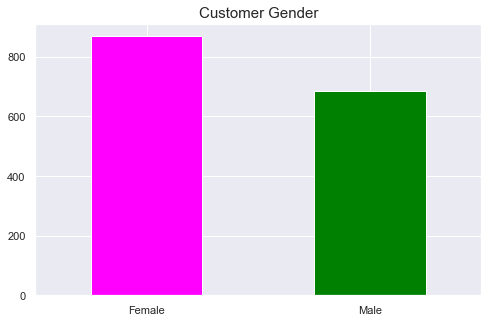

In [92]:
plt.figure(figsize = (8,5))
ax = seg.Gender.value_counts().plot(kind='bar', color=['magenta', 'green'], rot=0)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels [0] = 'Female'
labels [1] = 'Male'

ax.set_xticklabels(labels)

plt.title('Customer Gender', fontsize = 15)


<Figure size 800x480 with 0 Axes>

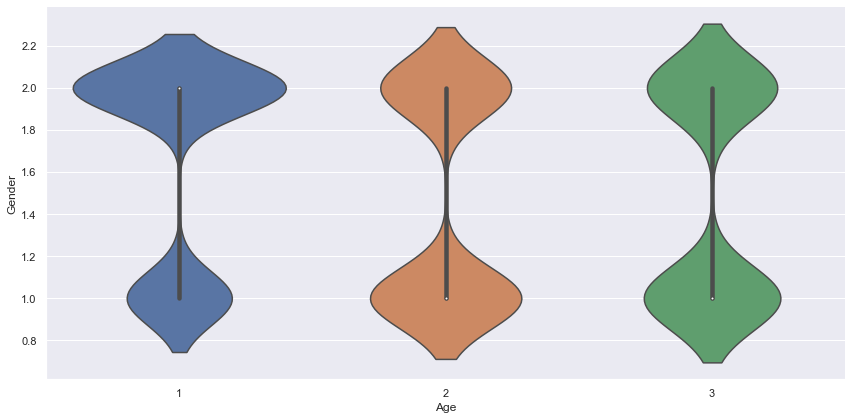

In [112]:
plt.figure(figsize = (10,6), dpi = 80)
sns.catplot(x='Age', y='Gender', data = seg, height = 6, aspect =2, kind='violin')

### Standardization

In [94]:
scaler = StandardScaler()
seg_std = scaler.fit_transform(seg)

### Hierarchical Clustering

In [95]:
hier_clust = linkage(seg_std, method = 'ward')

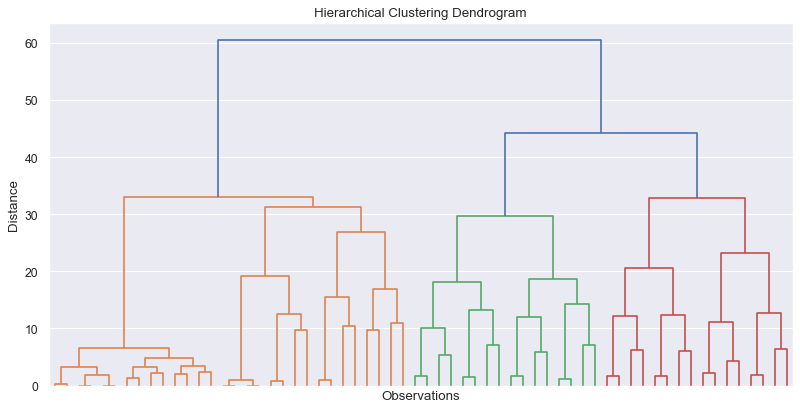

In [96]:
plt.figure (figsize = (12,6), dpi =80)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust, 
           truncate_mode = 'level',
           p=5,show_leaf_counts = True,
          no_labels = True)

plt.show()

## K- Means Clustering

In [97]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(seg_std)
    wcss.append(kmeans.inertia_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'K-means clustering')

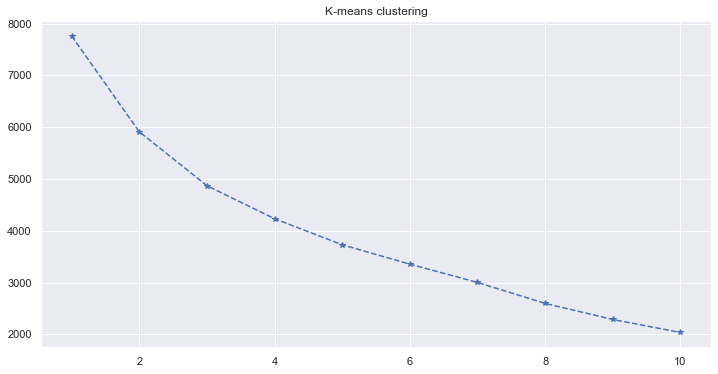

In [98]:
plt.figure(figsize = (12,6))
plt.plot(range(1,11), wcss, marker = '*', linestyle = "--")
plt.title('K-means clustering')

In [99]:
kmeans = KMeans(n_clusters =3, init = 'k-means++', random_state =42)

<IPython.core.display.Javascript object>

In [100]:
kmeans.fit(seg_std)

KMeans(n_clusters=3, random_state=42)

In [101]:
seg_kmeans = seg.copy()
seg_kmeans['Segment K-means'] = kmeans.labels_

In [102]:
seg_analysis = seg_kmeans.groupby(['Segment K-means']).mean()
seg_analysis

,Gender,Age,Income,Setting,Marital
Segment K-means,,,,,
0,1.453465,1.409901,1.655446,1.534653,1.946535
1,1.449275,2.648551,2.838768,1.510870,1.168478
2,1.789899,1.284848,9.919192,1.373737,1.820202


In [114]:
seg_analysis['N Obs'] = seg_kmeans[['Segment K-means', 'Gender']].groupby(['Segment K-means']).count()
seg_analysis

,Gender,Age,Income,Setting,Marital,N Obs
Segment K-means,,,,,,
0,1.453465,1.409901,1.655446,1.534653,1.946535,505
1,1.449275,2.648551,2.838768,1.510870,1.168478,552
2,1.789899,1.284848,9.919192,1.373737,1.820202,495


In [115]:
seg_analysis['Prop Obs'] = seg_analysis['N Obs']/seg_analysis['N Obs'].sum()

In [116]:
seg_analysis

,Gender,Age,Income,Setting,Marital,N Obs,Prop Obs
Segment K-means,,,,,,,
0,1.453465,1.409901,1.655446,1.534653,1.946535,505,0.325387
1,1.449275,2.648551,2.838768,1.510870,1.168478,552,0.355670
2,1.789899,1.284848,9.919192,1.373737,1.820202,495,0.318943


In [118]:
seg_analysis.rename({0: 'Standard', 
                     1:'Well-off', 
                     2:'Young adults'})

,Gender,Age,Income,Setting,Marital,N Obs,Prop Obs
Segment K-means,,,,,,,
Standard,1.453465,1.409901,1.655446,1.534653,1.946535,505,0.325387
Well-off,1.449275,2.648551,2.838768,1.510870,1.168478,552,0.355670
Young adults,1.789899,1.284848,9.919192,1.373737,1.820202,495,0.318943


In [119]:
seg_kmeans['Labels'] = seg_kmeans['Segment K-means'].map({0: 'Standard', 
                     1:'Well-off', 
                     2:'Young adults'})

In [121]:
seg_kmeans.head()

,Gender,Age,Income,Setting,Marital,Segment K-means,Labels
ID,,,,,,,
147072,2,3,10,2,1,1,Well-off
147678,1,3,10,1,1,1,Well-off
147708,2,3,10,1,2,2,Young adults
147909,2,2,10,1,1,2,Young adults
146754,2,2,10,2,2,2,Young adults


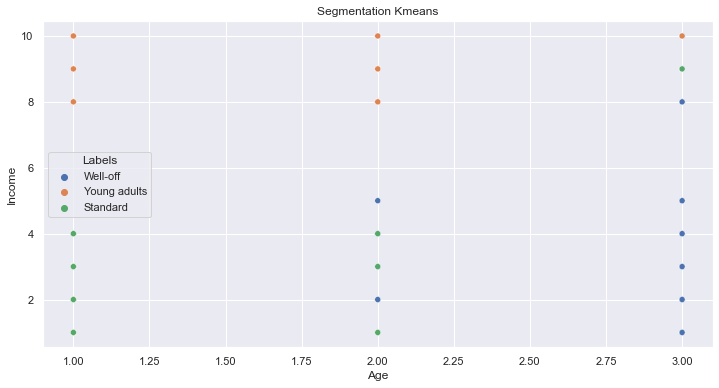

In [123]:
plt.figure(figsize = (12,6))
sns.scatterplot(y= 'Income', x = 'Age', data = seg_kmeans, hue='Labels')
plt.title('Segmentation Kmeans')
plt.show()

## Principle Component analysis

In [124]:
pca = PCA()

<IPython.core.display.Javascript object>

In [125]:
pca.fit(seg_std)

PCA()

In [126]:
pca.explained_variance_ratio_

array([0.33171191, 0.22290844, 0.18245191, 0.14028885, 0.12263888])

Text(0, 0.5, 'Cumulative explained variance')

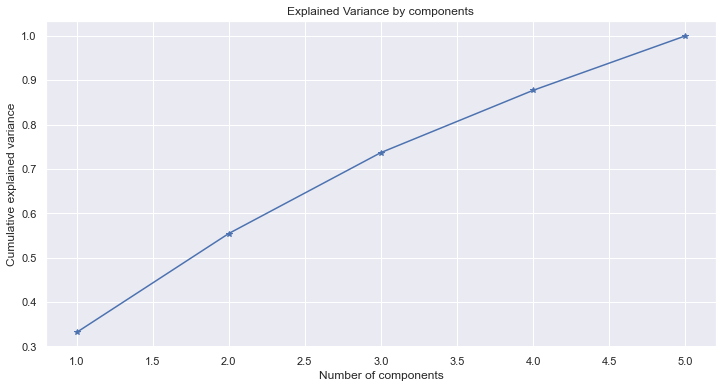

In [130]:
plt.figure(figsize=(12,6))
plt.plot(range(1,6), pca.explained_variance_ratio_.cumsum(), marker = '*')
plt.title('Explained Variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [131]:
pca = PCA(n_components = 4)

<IPython.core.display.Javascript object>

In [132]:
pca.fit(seg_std)

PCA(n_components=4)

In [133]:
pca.components_

array([[ 0.42118778, -0.57087939,  0.53749602, -0.23787045,  0.38886148],
       [-0.41943836, -0.23673607, -0.14457654,  0.56630472,  0.65301155],
       [-0.51610246, -0.24541718, -0.30198923, -0.74612334,  0.15972205],
       [ 0.61609996, -0.00926249, -0.73012292, -0.06596688,  0.28793044]])

In [134]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = seg.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4'])

In [135]:
df_pca_comp

,Gender,Age,Income,Setting,Marital
Component 1,0.421188,-0.570879,0.537496,-0.237870,0.388861
Component 2,-0.419438,-0.236736,-0.144577,0.566305,0.653012
Component 3,-0.516102,-0.245417,-0.301989,-0.746123,0.159722
Component 4,0.616100,-0.009262,-0.730123,-0.065967,0.287930


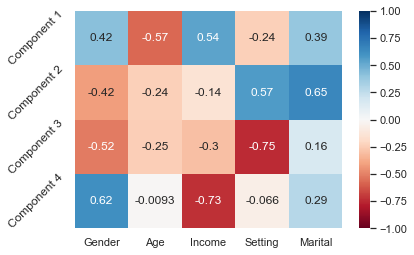

In [136]:
sns.heatmap(data = df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks(rotation =45, fontsize = 12)
plt.show()

In [137]:
pca_scores = pca.transform(seg_std)

In [138]:
pca_scores

array([[-0.41732739, -0.99928414, -2.17181692, -0.80088991],
       [-0.78934332, -1.28849158,  0.36185439, -1.9097412 ],
       [ 0.7029544 , -1.0519659 , -0.41318882, -0.19198801],
       ...,
       [-0.78049023, -0.41545141, -1.26256252,  0.66988711],
       [ 0.91659862, -0.13713504,  0.87720298,  1.47273134],
       [ 0.44025576,  0.99690751, -0.61693186,  1.34063064]])

## K- means Clustering with PCA

In [139]:
wcss = []
for i in range (1,11):
    kmeans_pca = KMeans(n_clusters =i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(pca_scores)
    wcss.append(kmeans_pca.inertia_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'WCSS')

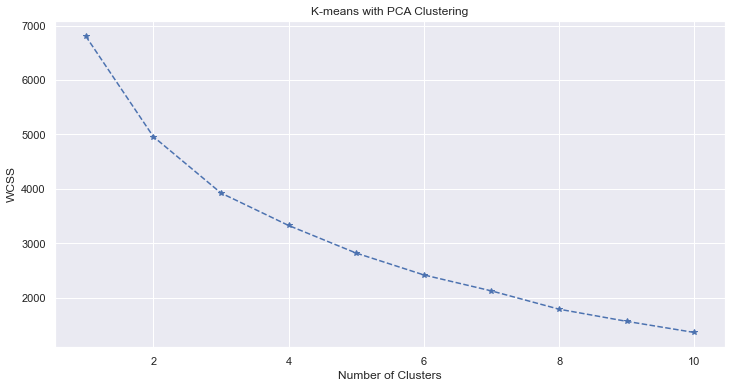

In [140]:
plt.figure(figsize = (12,6))
plt.plot(range(1,11), wcss, marker = '*', linestyle = '--')
plt.title('K-means with PCA Clustering')
plt.xlabel ('Number of Clusters')
plt.ylabel ('WCSS')

In [141]:
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

<IPython.core.display.Javascript object>

In [142]:
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=3, random_state=42)

In [143]:
pca_scores = pd.DataFrame(pca_scores)

In [144]:
pca_scores.columns = ['Component 1', 'Component 2', 'Component 3', 'Component 4']

In [145]:
df_seg_pca_kmeans = pd.concat([seg.reset_index(drop = True), pca_scores], axis = 1)

In [146]:
df_seg_pca_kmeans['Segment K-means pca'] = kmeans_pca.labels_

In [147]:
df_seg_pca_kmeans_freq = df_seg_pca_kmeans.groupby(['Segment K-means pca']).mean()
df_seg_pca_kmeans_freq

,Gender,Age,Income,Setting,Marital,Component 1,Component 2,Component 3,Component 4
Segment K-means pca,,,,,,,,,
0,1.469185,2.013917,2.155070,1.000000,1.455268,-0.450377,-0.618438,0.887836,0.331898
1,1.811441,1.222458,9.864407,1.338983,1.832627,1.519521,-0.160176,-0.214319,-0.505324
2,1.431542,2.114385,2.726170,2.000000,1.615251,-0.850388,0.670152,-0.598653,0.124034


In [ ]:
df_seg_pca_kmeans_freq['N Obs'] = df_seg_pca_kmeans[['Segment K-means pca', 'Sex']].groupby(['Segment K-means pca']).count()
df_seg_pca_kmeans_freq['Prop Obs'] = df_seg_pca_kmeans_freq['N Obs']/df_seg_pca_kmeans_freq['N Obs'].sum()

In [152]:
df_seg_pca_kmeans_freq.rename({0: 'Standard', 
                     1:'Young adults', 
                     2:'Well off'})

,Gender,Age,Income,Setting,Marital,Component 1,Component 2,Component 3,Component 4
Segment K-means pca,,,,,,,,,
Standard,1.469185,2.013917,2.155070,1.000000,1.455268,-0.450377,-0.618438,0.887836,0.331898
Young adults,1.811441,1.222458,9.864407,1.338983,1.832627,1.519521,-0.160176,-0.214319,-0.505324
Well off,1.431542,2.114385,2.726170,2.000000,1.615251,-0.850388,0.670152,-0.598653,0.124034


In [153]:
df_seg_pca_kmeans['Legend'] = df_seg_pca_kmeans['Segment K-means pca'].map({0: 'Standard', 
                     1:'Young adults', 
                     2:'Well off'})

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Component 2', ylabel='Component 1'>

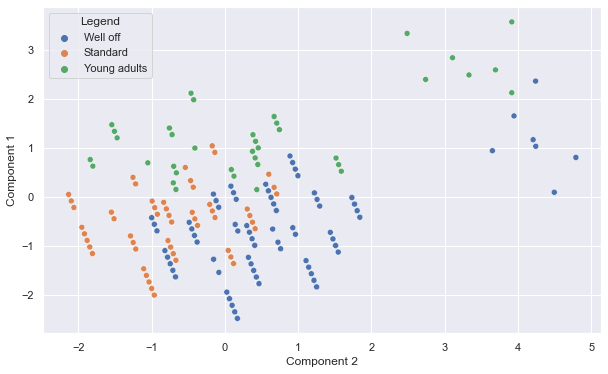

In [154]:
x_axis = df_seg_pca_kmeans['Component 2']
y_axis = df_seg_pca_kmeans['Component 1']
plt.figure (figsize = (10,6))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmeans['Legend'])